In [3]:
import numpy as np

# GP Package
import matplotlib.pyplot as plt
from squidward import gpr
from squidward.kernels import distance, kernel_base

import model_viz as mv

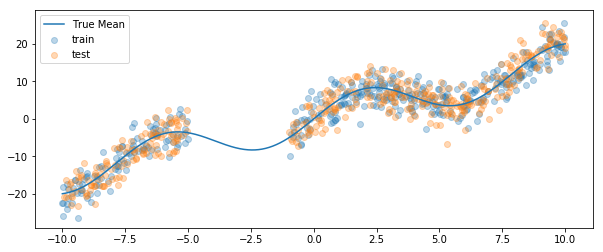

In [2]:
N = 500
l, u = -10, 10

# features
x_train = np.random.uniform(l, u, N)
x_test = np.random.uniform(l, u, N)

# missing data
x_train = x_train[np.where(np.logical_or(x_train>=-1.0, x_train<=-5.0))]
x_test = x_test[np.where(np.logical_or(x_test>=-1.0, x_test<=-5.0))]

# targets
y_train = 1.5*x_train + 5*np.sin(0.8*x_train) + np.random.normal(0, 3, x_train.shape[0])
y_test = 1.5*x_test + 5*np.sin(0.8*x_test) + np.random.normal(0, 3, x_test.shape[0])

x_true = np.linspace(l, u, 1000)
y_true = 1.5*x_true + 5*np.sin(0.8*x_true)

mv.demo_plot(x_train, y_train, x_test, y_test, x_true, y_true)

In [4]:
d = distance.RBF(1.0, 5.0**2)
kernel = kernel_base.Kernel(d, 'k1')
model = gpr.GaussianProcess(kernel=kernel, var_l=10**2, inv_method='solve')
model.fit(x_train,y_train)

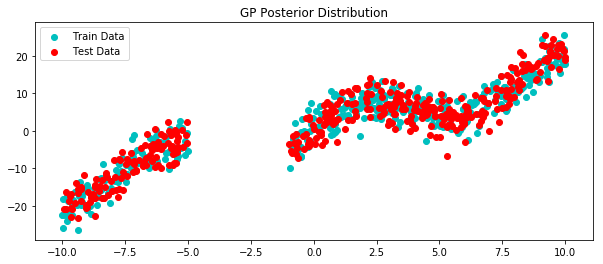

In [6]:
# generate data to plot posterior of model
x = np.linspace(l,u,100)

# pull the parameters of the posterior distribution
mean, var = model.posterior_predict(x)

# plot posterior of model
plt.figure(figsize=(10, 4))
plt.title("GP Posterior Distribution")
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()